In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import math

from sklearn.preprocessing import MinMaxScaler


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/housing.csv")


In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# New Section

In [ ]:
data.shape

(20640, 10)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

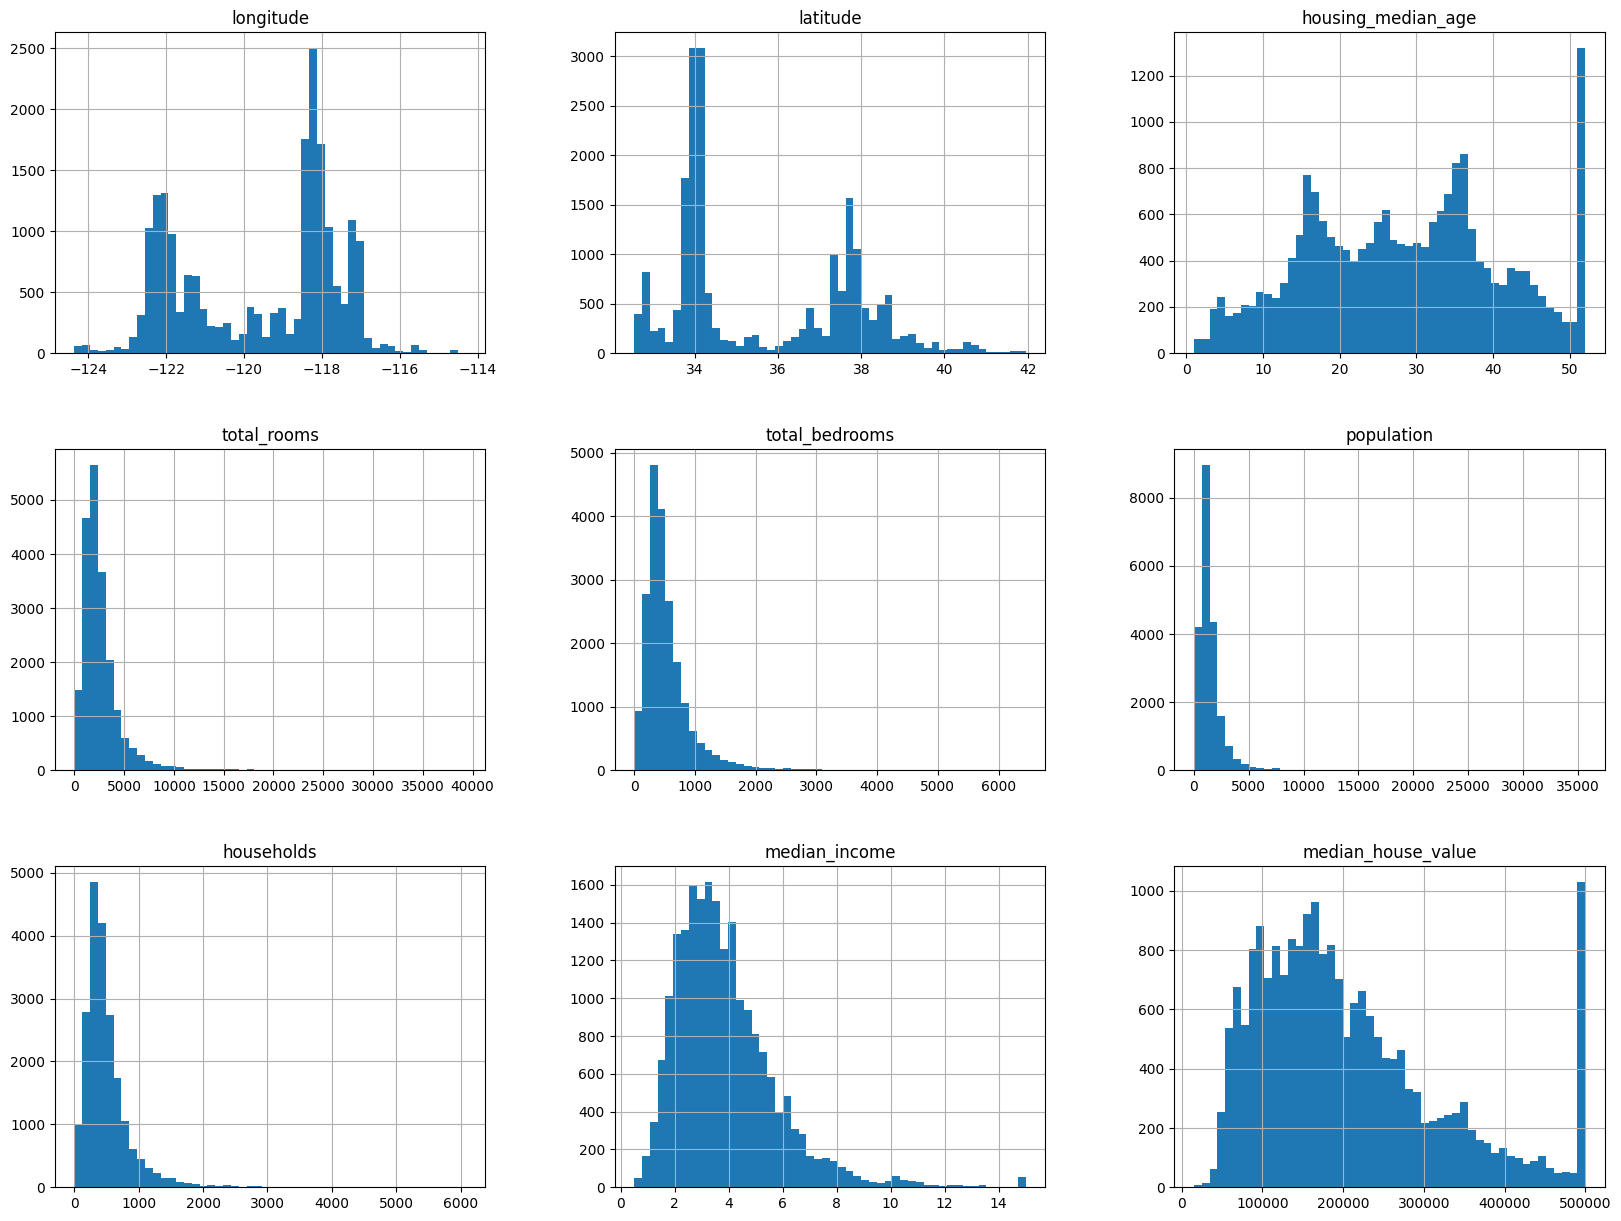

In [ ]:
data.hist(bins=50,figsize=(20,15))

plt.show

In [ ]:

data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

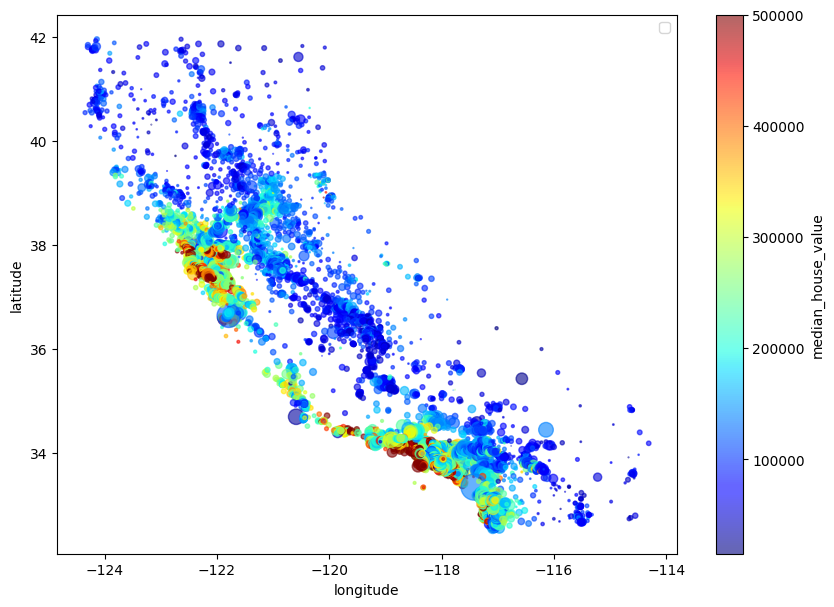

In [ ]:
data.plot(kind='scatter',x='longitude',
             y='latitude',alpha=0.6,s=data['population']/100,
             c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True ,figsize=(10,7))

plt.legend()

<Axes: xlabel='households', ylabel='median_house_value'>

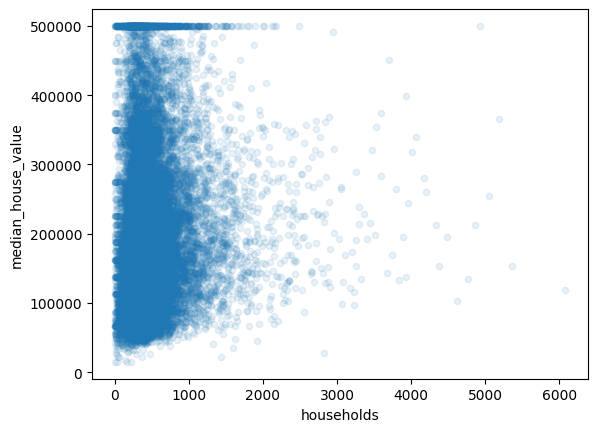

In [ ]:

data.plot(kind='scatter',x='households', y='median_house_value',alpha=0.1)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:


data['population_per_household'] = data['population'] / data['households']
data['income_per_capita'] = data['median_income'] / data['population'].where(data['population'] != 0, 1)
data['roums_per_houshold']=data['total_rooms']/data['households']
data['bedroms_per_room']=data['total_bedrooms']/ data['total_rooms']


<ipython-input-14-b11ef4f59d23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


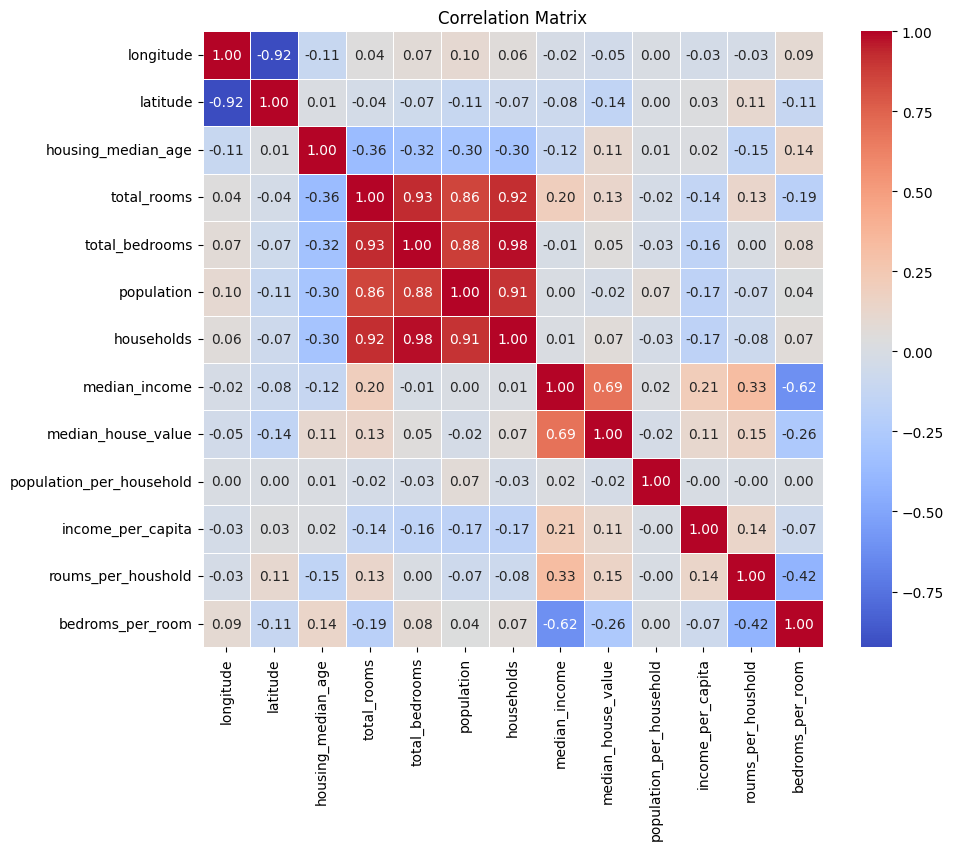

In [ ]:
correlation_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
correlation_matrix['median_house_value'].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
roums_per_houshold          0.151948
total_rooms                 0.134153
income_per_capita           0.114455
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_room           -0.255880
Name: median_house_value, dtype: float64

In [ ]:
data.isnull().sum()


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
population_per_household      0
income_per_capita             0
roums_per_houshold            0
bedroms_per_room            207
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Impute missing values in 'total_bedrooms' column
bedrooms_column = data['total_bedrooms'].values.reshape(-1, 1)
imputed_bedrooms = imputer.fit_transform(bedrooms_column)
data['total_bedrooms'] = imputed_bedrooms

# Impute missing values in 'bedrooms_per_room' column
bedrooms_per_room_column = data['bedroms_per_room'].values.reshape(-1, 1)
imputed_bedrooms_per_room = imputer.fit_transform(bedrooms_per_room_column)
data['bedroms_per_room'] = imputed_bedrooms_per_room


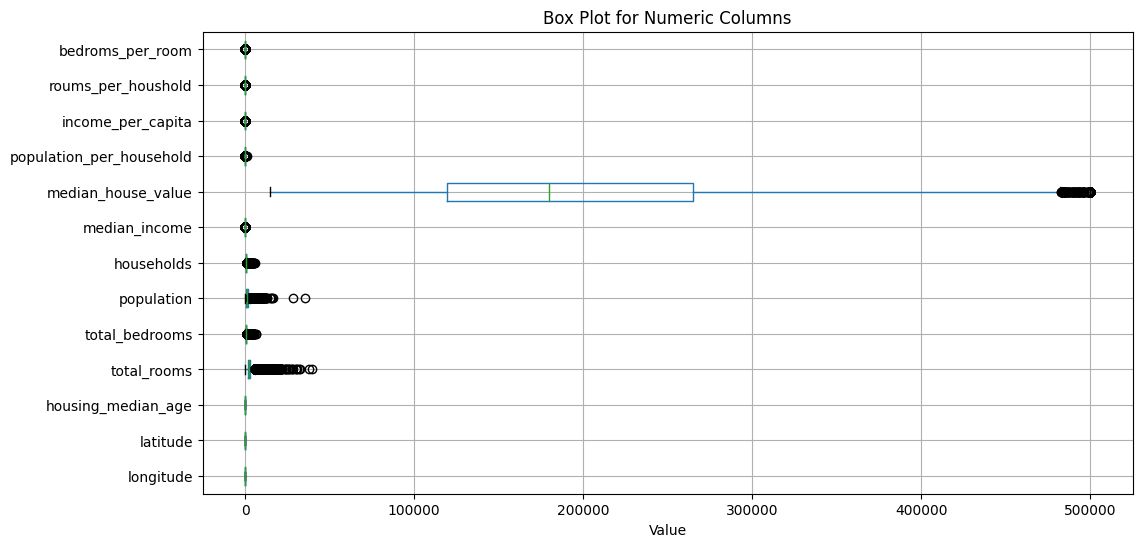

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data
numeric_cols = data.select_dtypes(include=['number'])

# Create box plots for all numeric columns
plt.figure(figsize=(12, 6))
numeric_cols.boxplot(vert=False)
plt.title('Box Plot for Numeric Columns')
plt.xlabel('Value')
plt.show()


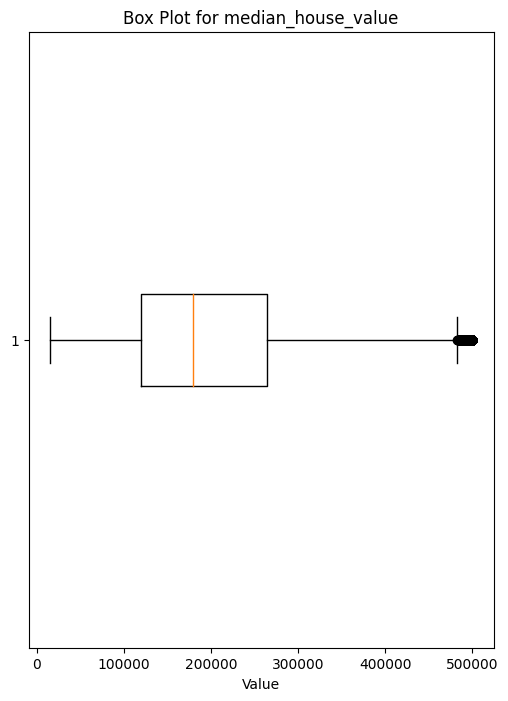

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data_no_outliers' is your DataFrame without outliers
plt.figure(figsize=(6, 8))
plt.boxplot(data['median_house_value'], vert=False)
plt.title('Box Plot for median_house_value')
plt.xlabel('Value')
plt.show()


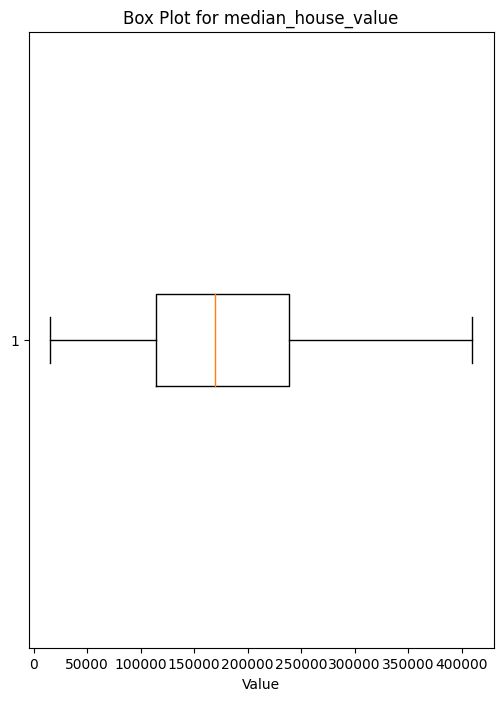

In [ ]:
# Calculate the 98th percentile of median_house_value
percentile_92 = data['median_house_value'].quantile(0.92)

# Remove the top 2% of median_house_value
data_no_outliers = data[data['median_house_value'] <= percentile_92]


import matplotlib.pyplot as plt

# Assuming 'data_no_outliers' is your DataFrame without outliers
plt.figure(figsize=(6, 8))
plt.boxplot(data_no_outliers['median_house_value'], vert=False)
plt.title('Box Plot for median_house_value')
plt.xlabel('Value')
plt.show()

In [ ]:
data.isnull().sum()


longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
population_per_household    0
income_per_capita           0
roums_per_houshold          0
bedroms_per_room            0
dtype: int64

In [ ]:
data_encoded = pd.get_dummies(data_no_outliers, columns=['ocean_proximity'], prefix=['ocean_proximity'])

data_encoded


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,population_per_household,income_per_capita,roums_per_houshold,bedroms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2.109842,0.003457,6.238137,0.155797,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2.802260,0.014632,8.288136,0.129516,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2.547945,0.010113,5.817352,0.184458,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2.181467,0.006807,6.281853,0.172096,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,2.139896,0.009774,4.761658,0.231774,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.560606,0.001847,5.045455,0.224625,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3.122807,0.007182,6.114035,0.215208,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.325635,0.001688,5.205543,0.215173,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.123209,0.002520,5.329513,0.219892,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split


# Split your data into features (X) and target variable (y)
X = data_encoded.drop(columns=['median_house_value'])
y = data_encoded['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
neural_network = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the neural network model
neural_network.compile(optimizer='adam', loss='mean_squared_error')

# List of models for iteration
models = [
    ("Linear Regression", linear_reg),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Neural Network", neural_network),
]

# Dictionary to store MSE for each model
mse_results = {}
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Dictionary to store RMSE for each model
rmse_results = {}

# Evaluate and compare the models
for name, model in models:
    if name == "Neural Network":
        # Train neural network separately due to its unique training process
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
        predictions = model.predict(X_test).reshape(-1)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)  # Calculate RMSE
    rmse_results[name] = rmse
    print(f"{name} Root Mean Squared Error (RMSE): {rmse:.2f}")

# Choose the best-performing model based on RMSE
best_model_rmse = min(rmse_results, key=rmse_results.get)
print(f"Best Model (RMSE): {best_model_rmse} with RMSE: {rmse_results[best_model_rmse]:.2f}")


Linear Regression Root Mean Squared Error (RMSE): 51646.79
Decision Tree Root Mean Squared Error (RMSE): 55838.54
Random Forest Root Mean Squared Error (RMSE): 39600.87
119/119 [==============================] - 0s 1ms/step
Neural Network Root Mean Squared Error (RMSE): 53903.44
Best Model (RMSE): Random Forest with RMSE: 39600.87


In [ ]:
#-----------------------------------------------#

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math

# Assuming X and y are your feature matrix and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for SVM (it's crucial for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM Regressor
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.2)  # You can experiment with different kernels and hyperparameters

# Train the model
svm_regressor.fit(X_train_scaled, y_train)

# Make predictions
predictions_svm = svm_regressor.predict(X_test_scaled)

# Calculate RMSE for SVM
mse_svm = mean_squared_error(y_test, predictions_svm)
rmse_svm = math.sqrt(mse_svm)
print(f"SVM Root Mean Squared Error (RMSE): {rmse_svm:.2f}")


SVM Root Mean Squared Error (RMSE): 85525.34


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math

# Assuming X and y are your feature matrix and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can experiment with different values for k

# Train the model
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions
predictions_knn = knn_regressor.predict(X_test_scaled)

# Calculate RMSE for KNN
mse_knn = mean_squared_error(y_test, predictions_knn)
rmse_knn = math.sqrt(mse_knn)
print(f"KNN Root Mean Squared Error (RMSE): {rmse_knn:.2f}")


KNN Root Mean Squared Error (RMSE): 48321.71


In [ ]:
'''from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
X = data_encoded.drop(columns=['median_house_value'])
y = data_encoded['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
y_train_normalized = scaler.fit_transform(X_train)
y_test_normalized = scaler.transform(X_test)



# Split the data into training and testing sets

# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)
neural_network = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the neural network model
neural_network.compile(optimizer='adam', loss='mean_squared_error')

# List of models for iteration
models = [
    ("Linear Regression", linear_reg),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest),
    ("Gradient Boosting", gradient_boosting),
    ("Neural Network", neural_network),
]

# Dictionary to store MSE for each model
mse_results = {}
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Dictionary to store RMSE for each model
rmse_results = {}

# Evaluate and compare the models
for name, model in models:
    if name == "Neural Network":
        # Train neural network separately due to its unique training process
        model.fit(X_train_normalized, y_train_normalized, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
        predictions = model.predict(X_test_normalized).reshape(-1)
    else:
        model.fit(X_train_normalized, y_train_normalized)
        predictions = model.predict(X_test_normalized)

    mse = mean_squared_error(y_test_normalized, predictions)
    rmse = math.sqrt(mse)  # Calculate RMSE
    rmse_results[name] = rmse
    print(f"{name} Root Mean Squared Error (RMSE): {rmse:.2f}")

# Choose the best-performing model based on RMSE
best_model_rmse = min(rmse_results, key=rmse_results.get)
print(f"Best Model (RMSE): {best_model_rmse} with RMSE: {rmse_results[best_model_rmse]:.2f}")

'''



Linear Regression Root Mean Squared Error (RMSE): 0.00
Decision Tree Root Mean Squared Error (RMSE): 0.31
Random Forest Root Mean Squared Error (RMSE): 0.20


ValueError: ignored